## Load

In [49]:
import pandas as pd
import numpy as np

import matplotlib as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse, rmspe

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [93]:
df = pd.read_csv('./data/train.csv', index_col = 'Id')

In [94]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Explore

In [95]:
# I save original df in order to keep it intact from changes. 

df_original = df

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [97]:
nulls = df.isnull().sum()
nulls = nulls[nulls > 0]
nulls

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

## Clean

In [98]:
# LotFrontage
# lotFrontage nulls son un problema ya que no es posible que una propiedad no tenga frente a la calle
# para resolver esto considero que debe de haber una proporcion entre el LotFrontage (frente linear
# que da a la calle) y el LotArea ya que el LotArea = LotFrontage * LotDepth.
# Inicialmente voy a hacer una division para encontrar el fondo mediano.
# Tambien podria hacer una regresion lineal para buscar llenar estos NAs (lo intento si tengo tiempo)

df[:20]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


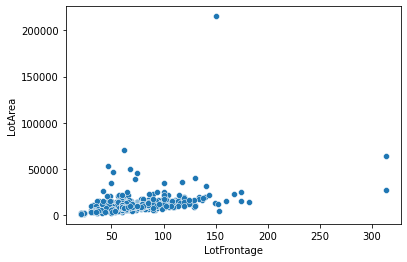

In [99]:
sns.scatterplot(x=df['LotFrontage'], y = df['LotArea']);

In [100]:
median_depth = df['LotArea'].median() / df['LotFrontage'].median()
median_depth

137.3695652173913

In [101]:
df['LotFrontage'].fillna(df['LotArea'] / median_depth, inplace = True)
df['LotFrontage'].isnull().sum()

0

In [102]:
# Alley
# Alley NAs are easy to fill since it is a category I only have to change the name so that it is
# recognized as a string.
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [103]:
df['Alley'].fillna('NoAlley', inplace = True)
df['Alley'].value_counts()

NoAlley    1369
Grvl         50
Pave         41
Name: Alley, dtype: int64

In [104]:
# MasVnrType
# I will assume NAs = None

df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [105]:
df['MasVnrType'].fillna('None', inplace = True)
df['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [106]:
# MasVnrArea
# this variable is a funtion of MasVnrType, since NAs in MasVnrArea coincide with None category of
# MasVnrType MasVnrArea should be = 0

df_original[['MasVnrType','MasVnrArea']][df_original['MasVnrArea'].isnull()]

,MasVnrType,MasVnrArea
Id,,
235,None,NaN
530,None,NaN
651,None,NaN
937,None,NaN
974,None,NaN
978,None,NaN
1244,None,NaN
1279,None,NaN


In [107]:
df['MasVnrArea'].fillna(0, inplace = True)
df['MasVnrArea'].isnull().sum()

0

In [108]:
# Basement variables (BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2)
# I will fill the NAs with 'No Basement' values
# I will deal first with the tw values that have 38 NAs and then with all of them together. 

df[['BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']][df['BsmtFinType2'].isnull()]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
Id,,,,,
18,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN
157,NaN,NaN,NaN,NaN,NaN
183,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN
333,Gd,TA,No,GLQ,NaN
343,NaN,NaN,NaN,NaN,NaN


In [109]:
df.at[949, 'BsmtExposure'] = 'No'
df['BsmtExposure'][df['BsmtQual'] == 'Gd'].value_counts()

No    360
Av    135
Gd     69
Mn     54
Name: BsmtExposure, dtype: int64

In [110]:
df.at[333, 'BsmtFinType2'] = 'Unf'
df['BsmtFinType2'][df['BsmtQual'] == 'Gd'].value_counts()

Unf    568
LwQ     17
Rec     10
BLQ      9
GLQ      9
ALQ      5
Name: BsmtFinType2, dtype: int64

In [111]:
df[['BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']][df['BsmtFinType2'].isnull()]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
Id,,,,,
18,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN
157,NaN,NaN,NaN,NaN,NaN
183,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN
343,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN


In [112]:
df['BsmtQual'].fillna('No Basement', inplace = True)
df['BsmtCond'].fillna('No Basement', inplace = True)
df['BsmtExposure'].fillna('No Basement', inplace = True)
df['BsmtFinType1'].fillna('No Basement', inplace = True)
df['BsmtFinType2'].fillna('No Basement', inplace = True)

In [113]:
df[['BsmtQual','BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

In [114]:
# There is only one NA for Electrical, I will set it to 'Standard Circuit'

df['Electrical'].fillna('SBrkr', inplace = True)
df['Electrical'].isnull().sum()

0

In [115]:
# FireplaceQu
# I will place FireplaceQu to 'No Fireplace'

df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [116]:
df['FireplaceQu'].fillna('NoFireplace', inplace = True)
df['FireplaceQu'].value_counts()

NoFireplace    690
Gd             380
TA             313
Fa              33
Ex              24
Po              20
Name: FireplaceQu, dtype: int64

In [117]:
# Garage
# I will fill the garage NAs variablesnwith 'NoGarage'

df['GarageType'].fillna('NoGarage', inplace = True)
df['GarageYrBlt'].fillna('NoGarage', inplace = True)
df['GarageFinish'].fillna('NoGarage', inplace = True)
df['GarageQual'].fillna('NoGarage', inplace = True)
df['GarageCond'].fillna('NoGarage', inplace = True)

df[['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']].isnull().sum()

GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [118]:
# Pool
# I will set the pool NAs to 'NoPool'

df['PoolQC'].fillna('NoPool', inplace = True)
df['PoolQC'].isnull().sum()

0

In [119]:
# Fence
# I will set the fence NAs to 'NoFence'

df['Fence'].fillna('NoFence', inplace = True)
df['Fence'].isnull().sum()

0

In [120]:
# MiscFeature
# I will set the MiscFeature NAs to 'None'

df['MiscFeature'].fillna('MiscFeature', inplace = True)
df['MiscFeature'].isnull().sum()

0

In [121]:
nulls = df.isnull().sum()
nulls = nulls[nulls > 0]
nulls

Series([], dtype: int64)

## Model

Based on the data I decided the best model I can use is a Linear Regression.

### Model 1
Just throw everything in there!

In [122]:
df_dummy = pd.get_dummies(data = df )

In [123]:
df_dummy.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [124]:
x = df_dummy.drop('SalePrice', axis = 1)
y = df_dummy['SalePrice']

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.2)

In [126]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

coefficient = linreg.coef_
train_score = linreg.score(x_train, y_train)
y_intercept = linreg.intercept_

print('Coefficient:', coefficient)
print('y intercept:', y_intercept)
print('R squared:', train_score)

Coefficient: [-1.46470892e+02 -2.93915739e+01  7.32015047e-01  6.24028559e+03
  5.84807659e+03  1.87277005e+02  7.81155336e+01  3.33842166e+01
  1.74898468e+01  1.05396893e+01 -1.56256027e+00  2.64669630e+01
  7.75086013e+00  2.76992366e+01 -7.34365609e+00  2.81064349e+01
 -9.74431849e+01 -9.96502139e+02  4.15402825e+03  1.16401361e+03
 -1.99132040e+03 -1.32610680e+04  1.42041762e+03  8.68654562e+03
  5.17614129e+03  1.87760600e+01  1.84327554e+01 -6.11855084e+00
  2.63786484e+01  4.22010344e+01  3.01756217e+01  3.63792983e+02
  3.03470964e+00 -5.00920319e+02 -9.64646924e+02 -1.54490291e+04
  3.37061082e+03 -1.39862880e+03  8.53792231e+03  4.93912475e+03
 -1.11340127e+04  1.11340127e+04 -2.55462572e+03 -1.72495171e+03
  4.27957743e+03 -3.19460251e+03 -8.14141170e+01  4.39577321e+03
 -1.11975658e+03 -5.86821266e+03  8.04642226e+03 -8.56423812e+03
  6.38602852e+03  2.48318308e+04 -2.48318308e+04  2.13018490e+03
  1.17556903e+04 -1.00149493e+04 -4.29392561e+03  4.22999717e+02
  6.49674858

In [127]:
test_score = linreg.score(x_test,y_test)
predicted = linreg.predict(x_test)
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted':predicted})

print('Test R squared:', test_score)
print('rmse:', rmse(y_test, predicted))
print(df_pred)

Test R squared: 0.8444269304403622
rmse: 30617.3384994818
      Actual      Predicted
Id                         
823   225000  191822.707572
752   162000  152019.751528
682   159434   94926.989340
804   582933  427655.283331
475   251000  286172.540312
...      ...            ...
666   230500  204101.040943
1342  155000  169806.582259
921   201000  199460.269769
523   159000  201209.702197
1148  174500  171527.332431

[292 rows x 2 columns]


### Model 2

Cutoff rate. Maybe using all variables is not such a great idea. I will use the correlation to the target (SalePrice) in order to have a cutoff rate and see how that works. 

In [128]:
def linreg_cutoff(cutoff):
    
    cols = df_dummy.corr()['SalePrice']
    cols = cols[abs(cols) < cutoff].index
    
    df_dummy_cut = df_dummy.drop(cols, axis = 1)
    
    x = df_dummy_cut.drop('SalePrice', axis = 1)
    y = df_dummy_cut['SalePrice']
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.2)
    
    linreg = LinearRegression()
    linreg.fit(x_train, y_train)

    test_score = linreg.score(x_test,y_test)
    predicted = linreg.predict(x_test)
    df_pred = pd.DataFrame({'Actual': y_test, 'Predicted':predicted})
    
    print(df_dummy_cut.columns)
    print('Test R squared:', test_score)
    print('rmse:', rmse(y_test, predicted))
    print(df_pred)

In [129]:
linreg_cutoff(0.75)

# It seems that the cutoff rate is too high since only 'OverallQual' made the cut. I am going to lower
# the cutoff rate and the model should improve. 

Index(['OverallQual', 'SalePrice'], dtype='object')
Test R squared: 0.6559883417567101
rmse: 43349.78701917832
      Actual      Predicted
Id                         
875    66500  130775.974644
208   141000   84951.888829
182   200100  222424.146274
1401  120000  176600.060459
101   205000  176600.060459
...      ...            ...
847   213000  222424.146274
511   164900  130775.974644
1085  187500  176600.060459
990   197000  222424.146274
649   155000  176600.060459

[292 rows x 2 columns]


In [130]:
linreg_cutoff(0.5)

# Much better, lets see if I cna get better by lowering it even more.

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice', 'ExterQual_TA', 'BsmtQual_Ex', 'KitchenQual_Ex',
       'KitchenQual_TA'],
      dtype='object')
Test R squared: 0.8147008281866489
rmse: 31544.296308665715
      Actual      Predicted
Id                         
1264  180500  164247.311713
1428  140000  132021.135159
50    127000  110399.294175
35    277500  327706.701079
785   128000  123480.132875
...      ...            ...
900   135000  129541.141507
523   159000  163162.066761
895   118858  144498.926026
200   274900  337885.891452
858   174000  166664.429399

[292 rows x 2 columns]


In [131]:
linreg_cutoff(0.4)

# better still, I am going to continue lowering it. 

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'SalePrice', 'Neighborhood_NridgHt',
       'ExterQual_Ex', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_PConc',
       'BsmtQual_Ex', 'BsmtQual_TA', 'BsmtFinType1_GLQ', 'HeatingQC_Ex',
       'KitchenQual_Ex', 'KitchenQual_TA', 'FireplaceQu_NoFireplace',
       'GarageFinish_Fin', 'GarageFinish_Unf'],
      dtype='object')
Test R squared: 0.8927696435651026
rmse: 26132.476038120574
      Actual      Predicted
Id                         
763   215200  193718.805198
1195  158000  140030.118614
316   188500  207510.599642
308    89500  117677.705029
509   161000  174932.326956
...      ...            ...
959   185000  200131.930719
1112  205000  210384.401519
1007  163500  178811.310196
15    157000  148346.954009
781   176000  179993.309897

[292 rows x 2 columns]


In [132]:
linreg_cutoff(0.3)

# Ok now it didnt improve, I am going to increase it by a little bit. 

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'SalePrice', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd',
       'MasVnrType_None', 'MasVnrType_Stone', 'ExterQual_Ex', 'ExterQual_Gd',
       'ExterQual_TA', 'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Ex',
       'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtFinType1_GLQ', 'HeatingQC_Ex',
       'HeatingQC_TA', 'KitchenQual_Ex', 'KitchenQual_Gd', 'KitchenQual_TA',
       'FireplaceQu_Gd', 'FireplaceQu_NoFireplace', 'GarageType_Attchd',
       'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_Unf',
       'SaleType_New', 'SaleCondition_Partial'],
      dtype='object')
Test R squared: 0.8360188490163469
rmse: 29562.709317364424
      Actual      Predicted
Id                      

In [133]:
linreg_cutoff(0.35)

# Very close, but not quite there yet

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'SalePrice',
       'Neighborhood_NridgHt', 'MasVnrType_None', 'ExterQual_Ex',
       'ExterQual_Gd', 'ExterQual_TA', 'Foundation_PConc', 'BsmtQual_Ex',
       'BsmtQual_TA', 'BsmtFinType1_GLQ', 'HeatingQC_Ex', 'KitchenQual_Ex',
       'KitchenQual_TA', 'FireplaceQu_NoFireplace', 'GarageType_Detchd',
       'GarageFinish_Fin', 'GarageFinish_Unf', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')
Test R squared: 0.4106895879758331
rmse: 57500.374813345356
      Actual      Predicted
Id                         
637    60000   31774.592594
332   139000  132841.560737
1367  193000  211182.890497
1238  195000  213289.059313
24    129900  145355.908954
...      ...            ...
1065  154000  146514.638062
243    79000  104228.043573
672   103600  127564.458530
1334  125

In [134]:
linreg_cutoff(0.38)

# It seems that the optimal cutoof rate is 0.4. 

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'SalePrice',
       'Neighborhood_NridgHt', 'ExterQual_Ex', 'ExterQual_Gd', 'ExterQual_TA',
       'Foundation_PConc', 'BsmtQual_Ex', 'BsmtQual_TA', 'BsmtFinType1_GLQ',
       'HeatingQC_Ex', 'KitchenQual_Ex', 'KitchenQual_TA',
       'FireplaceQu_NoFireplace', 'GarageFinish_Fin', 'GarageFinish_Unf'],
      dtype='object')
Test R squared: 0.8096990407695905
rmse: 39770.49501749634
      Actual      Predicted
Id                         
1151  124000  125825.657214
1345  155835  201042.111787
992   168000  206821.302535
274   139000  170937.695419
1440  197000  196711.854505
...      ...            ...
1311  335000  267736.712144
1259  190000  193317.777041
1334  125500  127310.277562
1378  117000  142651.910359
502   226700  207946.396158

[292 rows x 2 columns]


### Model 3

ANOVA

I am going to try a different approach in trying to select the best columns for my linear regression.
Now I am going to use ANOVA as a filtering test and see how that works.

In [135]:
# I want to get all the p-values of the variables in order to see which one is not enough to reject
# the null hypothesis. 

cols = df.columns
dic = {}

for i in cols:
    
    try:
        model = ols(f'SalePrice ~ C({i})', data = df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        dic[i] = anova_table['PR(>F)'][0]
        
    except:
        print(i)
        
dic

1stFlrSF
2ndFlrSF
3SsnPorch


{'MSSubClass': 8.66216626608785e-79,
 'MSZoning': 8.817633866285304e-35,
 'LotFrontage': 6.610196968862629e-29,
 'LotArea': 6.590819654754342e-50,
 'Street': 0.11704860406780533,
 'Alley': 2.9963796805458385e-07,
 'LotShape': 6.447523852008467e-25,
 'LandContour': 2.7422167521366235e-08,
 'Utilities': 0.5847167739689381,
 'LotConfig': 3.1631674736044365e-06,
 'LandSlope': 0.1413963584114357,
 'Neighborhood': 1.5586002827677873e-225,
 'Condition1': 8.904549416140846e-08,
 'Condition2': 0.043425658360948464,
 'BldgType': 2.0567364604965262e-10,
 'HouseStyle': 3.376776535121222e-25,
 'OverallQual': 0.0,
 'OverallCond': 7.962288819824339e-38,
 'YearBuilt': 9.128103646602107e-107,
 'YearRemodAdd': 2.3547477020636498e-76,
 'RoofStyle': 3.6535230471027337e-17,
 'RoofMatl': 7.231444779967662e-08,
 'Exterior1st': 2.5860887286313106e-43,
 'Exterior2nd': 4.842185670691115e-43,
 'MasVnrType': 1.2797035312624795e-63,
 'MasVnrArea': 1.5274395901136082e-52,
 'ExterQual': 1.4395510967719157e-204,
 'Ex

In [136]:
drop_cols = []

for i in dic:
    val = dic.get(i)
    
    # I use a 99% confidence interval because there are too many columns. 
    
    if val >0.01:
        drop_cols.append(i)
    
drop_cols  
 

['Street',
 'Utilities',
 'LandSlope',
 'Condition2',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'YrSold']

In [137]:
df_anova = df.drop(drop_cols, axis = 1)
df_anova_dummy = pd.get_dummies(data = df_anova )

In [140]:
x = df_anova_dummy.drop('SalePrice', axis = 1)
y = df_anova_dummy['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.2)

linreg = LinearRegression()
linreg.fit(x_train, y_train)

test_score = linreg.score(x_test,y_test)
predicted = linreg.predict(x_test)
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted':predicted})

print('Test R squared:', test_score)
print('rmse:', rmse(y_test, predicted))
print(df_pred)

Test R squared: 0.7429288795978667
rmse: 37671.071135182654
     Actual      Predicted
Id                        
667  129000  168420.151009
488  175000  175008.232059
411   60000  104949.789153
287  159000  170183.607756
676  148500  149276.791599
..      ...            ...
596  319000  341421.080983
94   133900  194424.351886
707  302000  294610.381349
344  266000  317537.629404
948  270000  250166.255966

[292 rows x 2 columns]


In [91]:
# Looks good but not that good as the 0.4 cutoff model which for now is my best model scoring 0.16546
# in Kaggle. 